In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import time
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from VAE import VAE
from IPython.display import display

In [2]:
to_image = transforms.ToPILImage()
transform = transforms.Compose([
        transforms.ToTensor()
    ])

# Assuming output_tensor is the tensor you want to convert back to an image
#output_tensor = ... # This is your model's output
#image = to_image(output_tensor)


In [3]:
model = torch.load('cnn_vae_model.pth')

In [4]:
# Load the image
image1 = Image.open('/Users/Nate/Documents/cs583/midterm/data/img_align_celeba/img_align_celeba/img_align_celeba/000002.jpg')
image2 = Image.open('/Users/Nate/Documents/cs583/midterm/data/img_align_celeba/img_align_celeba/img_align_celeba/000001.jpg')



tensor([[-0.0789, -1.0622,  0.3424,  ..., -0.0713, -0.0406,  0.3450],
        [-0.0302, -1.4894, -0.4154,  ..., -0.0304,  0.1894,  0.5918],
        [-0.0995, -0.4412, -0.0308,  ...,  0.4137,  0.6606,  1.1968],
        ...,
        [ 0.0343, -0.5533,  0.0243,  ...,  0.1802,  0.3290,  1.1562],
        [-0.1557,  0.0055,  0.1924,  ...,  0.2244,  0.2751,  0.8752],
        [-0.0557, -0.3510,  1.1550,  ..., -0.0794,  0.3269, -0.2346]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


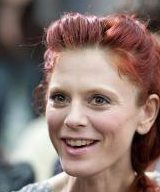

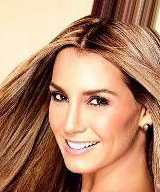

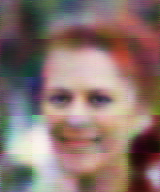

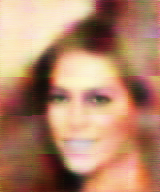

In [5]:
width, height = image1.size
crop_box = (9, 13, width - 9, height - 13)
cropped_image1 = image1.crop(crop_box)
cropped_image2 = image2.crop(crop_box)
device = torch.device("cuda")
transformed_image1 = transform(cropped_image1).to(device)
transformed_image2 = transform(cropped_image2).to(device)

batch_tensor = torch.stack([transformed_image1, transformed_image2], dim=0)
model.eval()
reconstructed_img, mu, logvar = model(batch_tensor)
rec_image1 = to_image(reconstructed_img[0])
rec_image2 = to_image(reconstructed_img[1])


# Show the image
display(cropped_image1)
display(cropped_image2)
display(rec_image1)
display(rec_image2)